In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as fd

In [2]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [3]:
file_name

'D:/OneDrive - Ingenio Azucarero Guabira S.A/UTEA_2023/CATASTRO/CATASTRO_2023-04-06.shp'

In [4]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

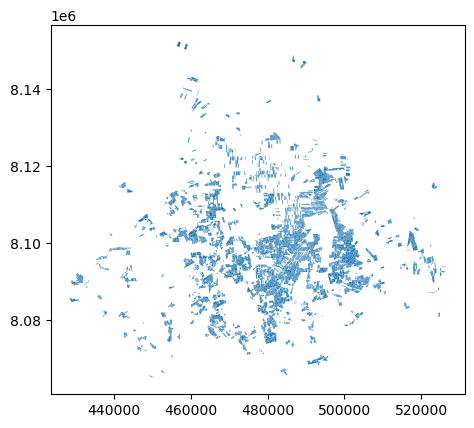

In [5]:
data.plot()
plt.show()

In [6]:
data.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
0,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,2018-05-30,FA,IAG,4,canha,79,0.77,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,2011-05-20,FY,NaN,11,canha,79,3.84,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,2018-05-20,FY,IAG,4,canha,79,2.25,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."


In [7]:
data.crs.name

'WGS 84 / UTM zone 20S'

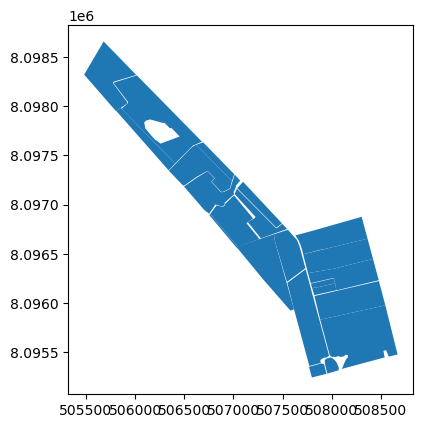

In [96]:
propiedad = data[data['unidad_01']==33]
propiedad.plot()
plt.show()

In [97]:
def quitar_caracteres(text):
    text = text.replace('_', ' ')
    text = text.replace('"', '')
    text = text.replace('.', '')
    return text

In [98]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'unidad_01':'int',
    'unidad_03':'int'
})

In [99]:
propiedad.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
10939,0000330000L5.4,33,SANTA_ANA--VICENTE_ROCA_GIL,633,AGROP._VICENTE_ROCA_GIL_SRL,L5.4,UCG_90-20,2022-05-25,FY,IAG,0,canha,40,0.65,"POLYGON Z ((507043.307 8096569.728 0.000, 5070..."
11994,0000330000L5.1,33,SANTA_ANA--VICENTE_ROCA_GIL,633,AGROP._VICENTE_ROCA_GIL_SRL,L5.1,UCG_90-20,2021-05-27,FY,IAG,1,canha,40,13.03,"POLYGON Z ((506914.098 8097004.561 0.000, 5070..."
11995,0000330000L2.2,33,SANTA_ANA--VICENTE_ROCA_GIL,633,AGROP._VICENTE_ROCA_GIL_SRL,L2.2,CITTCA_85-22,2016-05-17,FY,NaN,6,canha,40,1.65,"POLYGON Z ((507928.705 8095417.461 0.000, 5079..."


In [100]:
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']
file_name

'33_SANTA_ANA--VICENTE_ROCA_GIL'

In [101]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financia,soca,cultivo,zona,area,geometry
10939,0000330000L5.4,33,SANTA_ANA--VICENTE_ROCA_GIL,633,AGROP._VICENTE_ROCA_GIL_SRL,L5.4,UCG_90-20,2022-05-25,FY,IAG,0,canha,40,0.65,"POLYGON Z ((507043.307 8096569.728 0.000, 5070..."
11994,0000330000L5.1,33,SANTA_ANA--VICENTE_ROCA_GIL,633,AGROP._VICENTE_ROCA_GIL_SRL,L5.1,UCG_90-20,2021-05-27,FY,IAG,1,canha,40,13.03,"POLYGON Z ((506914.098 8097004.561 0.000, 5070..."
11995,0000330000L2.2,33,SANTA_ANA--VICENTE_ROCA_GIL,633,AGROP._VICENTE_ROCA_GIL_SRL,L2.2,CITTCA_85-22,2016-05-17,FY,NaN,6,canha,40,1.65,"POLYGON Z ((507928.705 8095417.461 0.000, 5079..."
11996,0000330000L2.1,33,SANTA_ANA--VICENTE_ROCA_GIL,633,AGROP._VICENTE_ROCA_GIL_SRL,L2.1,CITTCA_85-22,2016-05-17,FY,NaN,6,canha,40,1.75,"POLYGON Z ((507768.749 8095348.401 0.000, 5078..."
11997,0000330000L2.3,33,SANTA_ANA--VICENTE_ROCA_GIL,633,AGROP._VICENTE_ROCA_GIL_SRL,L2.3,UCG_90-20,2022-04-18,FY,IAG,0,canha,40,19.78,"POLYGON Z ((507548.478 8096202.337 0.000, 5077..."


In [102]:
num_columnas = len(propiedad.columns)
num_columnas

15

In [103]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [104]:
propiedad.head(3)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financia,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
10939,0000330000L5.4,33,SANTA_ANA--VICENTE_ROCA_GIL,633,AGROP._VICENTE_ROCA_GIL_SRL,L5.4,UCG_90-20,2022-05-25,FY,IAG,...,0.65,UCG_90-20,2022-05-25,0,,0,633,33,0000330000L5.4,0
11994,0000330000L5.1,33,SANTA_ANA--VICENTE_ROCA_GIL,633,AGROP._VICENTE_ROCA_GIL_SRL,L5.1,UCG_90-20,2021-05-27,FY,IAG,...,13.03,UCG_90-20,2021-05-27,1,,0,633,33,0000330000L5.1,0
11995,0000330000L2.2,33,SANTA_ANA--VICENTE_ROCA_GIL,633,AGROP._VICENTE_ROCA_GIL_SRL,L2.2,CITTCA_85-22,2016-05-17,FY,NaN,...,1.65,CITTCA_85-22,2016-05-17,6,,0,633,33,0000330000L2.2,0


In [105]:
propiedad.columns

Index(['cod', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05',
       'var', 'fs', 'tex', 'financia', 'soca', 'cultivo', 'zona', 'area',
       'geometry', 'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD',
       'FECHA_SIEM', 'CORTE', 'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP',
       'ID', 'CUADRANTE'],
      dtype='object')

In [106]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [107]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
10939,"POLYGON Z ((507043.307 8096569.728 0.000, 5070...",L5.4,FY,0.65,UCG_90-20,2022-05-25,0,,0,633,33,0000330000L5.4,0
11994,"POLYGON Z ((506914.098 8097004.561 0.000, 5070...",L5.1,FY,13.03,UCG_90-20,2021-05-27,1,,0,633,33,0000330000L5.1,0
11995,"POLYGON Z ((507928.705 8095417.461 0.000, 5079...",L2.2,FY,1.65,CITTCA_85-22,2016-05-17,6,,0,633,33,0000330000L2.2,0
11996,"POLYGON Z ((507768.749 8095348.401 0.000, 5078...",L2.1,FY,1.75,CITTCA_85-22,2016-05-17,6,,0,633,33,0000330000L2.1,0
11997,"POLYGON Z ((507548.478 8096202.337 0.000, 5077...",L2.3,FY,19.78,UCG_90-20,2022-04-18,0,,0,633,33,0000330000L2.3,0


In [108]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        elif year > 2000:
            return 'SOCA'
        else:
            return 'RENOVACION'
    except Exception as ex:
        return 'RENOVACION'

In [109]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [110]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [111]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
10939,"POLYGON Z ((507043.307 8096569.728 0.000, 5070...",L5.4,FY,0.65,UCG_90-20,20220525,0,HOJA,0,633,33,0000330000L5.4,0
11994,"POLYGON Z ((506914.098 8097004.561 0.000, 5070...",L5.1,FY,13.03,UCG_90-20,20210527,1,SOCA,0,633,33,0000330000L5.1,0
11995,"POLYGON Z ((507928.705 8095417.461 0.000, 5079...",L2.2,FY,1.65,CITTCA_85-22,20160517,6,SOCA,0,633,33,0000330000L2.2,0
11996,"POLYGON Z ((507768.749 8095348.401 0.000, 5078...",L2.1,FY,1.75,CITTCA_85-22,20160517,6,SOCA,0,633,33,0000330000L2.1,0
11997,"POLYGON Z ((507548.478 8096202.337 0.000, 5077...",L2.3,FY,19.78,UCG_90-20,20220418,0,HOJA,0,633,33,0000330000L2.3,0


In [112]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [113]:
tchs = pd.read_excel(fp_tch)

In [114]:
tchs.head(3)

,COD_AVANCE,CODIGO CAÑERO,INS,NOMBRE CAÑERO,DESSIG,CREA,COMPROMISO GRUPAL,COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,TN ENTREGA GRUPAL,TN ENTREGADAS INDIVIDUAL,% ENTREGA GRUPAL,HA COSECHA GRUPAL,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2022,RENDIMIENTO 2021,ESTIMATIVA RENDIMIENTO 2022,OBSERVACIONES
0,131_1,2224,NaN,CRUZ VARGAS WILLY WALDO,NaN,NaN,7067.07,0.00,NaN,NaN,0.00,42.86,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,81_36,41555,81.0,FRANCO GUZMAN CARLA DANIELA,NaN,NaN,7053.98,7053.98,0.0,0.0,7138.06,7138.06,1.011920,0.0,0.0,NaN,NaN,0.000000,59.896088,SIN CATASTRO
2,50_29,15501,50.0,WENDE RIOJA MAURICIO,NaN,NaN,4525.38,4525.38,0.0,0.0,3537.96,3537.96,0.781804,0.0,0.0,NaN,NaN,39.153575,0.000000,SIN CATASTRO


In [115]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO'] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [116]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'RENDIMIENT':'float',
    'COD_CA':'int',
    'COD_PROP':'int'
})

In [117]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

C:\Users\UTEA\AppData\Local\Temp\ipykernel_24880\1276023081.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tch = float(tchs[tchs['CODIGO CAÑERO'] == cod_ca].iloc[:,16])


,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
10939,"POLYGON Z ((507043.307 8096569.728 0.000, 5070...",L5.4,FY,0.65,UCG_90-20,20220525,0,HOJA,57.595517,633,33,0000330000L5.4,0
11994,"POLYGON Z ((506914.098 8097004.561 0.000, 5070...",L5.1,FY,13.03,UCG_90-20,20210527,1,SOCA,57.595517,633,33,0000330000L5.1,0
11995,"POLYGON Z ((507928.705 8095417.461 0.000, 5079...",L2.2,FY,1.65,CITTCA_85-22,20160517,6,SOCA,57.595517,633,33,0000330000L2.2,0


In [118]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [119]:
bloques = pd.read_excel(fp_bloques)

In [120]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,riegos_pos,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG9020,44743,44743.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG9020,44768,44768.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA8522,44783,44783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN


In [121]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [122]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

C:\Users\UTEA\AppData\Local\Temp\ipykernel_24880\261198729.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  bloque_int = int(bloque)


,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
10939,"POLYGON Z ((507043.307 8096569.728 0.000, 5070...",L5.4,FY,0.65,UCG_90-20,20220525,0,HOJA,57.595517,633,33,0000330000L5.4,358
11994,"POLYGON Z ((506914.098 8097004.561 0.000, 5070...",L5.1,FY,13.03,UCG_90-20,20210527,1,SOCA,57.595517,633,33,0000330000L5.1,358
11995,"POLYGON Z ((507928.705 8095417.461 0.000, 5079...",L2.2,FY,1.65,CITTCA_85-22,20160517,6,SOCA,57.595517,633,33,0000330000L2.2,358


In [123]:
propiedad['ID'] = propiedad.apply(lambda x : '0000' + str(x['COD_PROP']) + '0000' + x['NOM_LOTE'], axis=1)

In [124]:
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
10939,"POLYGON Z ((507043.307 8096569.728 0.000, 5070...",L5.4,FY,0.65,UCG_90-20,20220525,0,HOJA,57.595517,633,33,0000330000L5.4,358
11994,"POLYGON Z ((506914.098 8097004.561 0.000, 5070...",L5.1,FY,13.03,UCG_90-20,20210527,1,SOCA,57.595517,633,33,0000330000L5.1,358
11995,"POLYGON Z ((507928.705 8095417.461 0.000, 5079...",L2.2,FY,1.65,CITTCA_85-22,20160517,6,SOCA,57.595517,633,33,0000330000L2.2,358


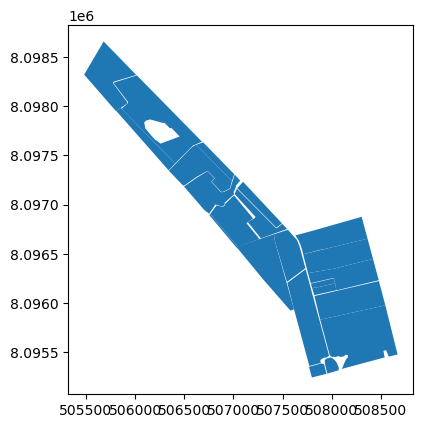

In [125]:
propiedad.plot()
plt.show()

In [126]:
#quitar_caracteres
propiedad['VARIEDAD'] = propiedad['VARIEDAD'].apply(quitar_caracteres)

In [127]:
propiedad

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
10939,"POLYGON Z ((507043.307 8096569.728 0.000, 5070...",L5.4,FY,0.65,UCG 90-20,20220525,0,HOJA,57.595517,633,33,0000330000L5.4,358
11994,"POLYGON Z ((506914.098 8097004.561 0.000, 5070...",L5.1,FY,13.03,UCG 90-20,20210527,1,SOCA,57.595517,633,33,0000330000L5.1,358
11995,"POLYGON Z ((507928.705 8095417.461 0.000, 5079...",L2.2,FY,1.65,CITTCA 85-22,20160517,6,SOCA,57.595517,633,33,0000330000L2.2,358
11996,"POLYGON Z ((507768.749 8095348.401 0.000, 5078...",L2.1,FY,1.75,CITTCA 85-22,20160517,6,SOCA,57.595517,633,33,0000330000L2.1,358
11997,"POLYGON Z ((507548.478 8096202.337 0.000, 5077...",L2.3,FY,19.78,UCG 90-20,20220418,0,HOJA,57.595517,633,33,0000330000L2.3,358
11998,"POLYGON Z ((507883.007 8095827.557 0.000, 5085...",L1,FY,33.41,CITTCA 85-22,20150318,7,SOCA,57.595517,633,33,0000330000L1,358
11999,"POLYGON Z ((507824.441 8096068.661 0.000, 5084...",L3,FY,17.04,UCG 90-20,20180621,4,SOCA,57.595517,633,33,0000330000L3,358
12000,"POLYGON Z ((507822.077 8096077.374 0.000, 5078...",L4.5,FY,1.66,UCG 90-20,20180621,4,SOCA,57.595517,633,33,0000330000L4.5,358
12001,"POLYGON Z ((507852.773 8096528.155 0.000, 5083...",L4.2,FY,14.30,UCG 90-20,20220421,0,HOJA,57.595517,633,33,0000330000L4.2,358
12002,"POLYGON Z ((507802.312 8096731.683 0.000, 5083...",L4.1,FY,14.72,RENOVACION,nan,122,RENOVACION,57.595517,633,33,0000330000L4.1,358


In [128]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
10939,"POLYGON Z ((507043.307 8096569.728 0.000, 5070...",L5.4,FY,0.65,UCG 90-20,20220525,0,HOJA,57.595517,633,33,0000330000L5.4,358
11994,"POLYGON Z ((506914.098 8097004.561 0.000, 5070...",L5.1,FY,13.03,UCG 90-20,20210527,1,SOCA,57.595517,633,33,0000330000L5.1,358
11995,"POLYGON Z ((507928.705 8095417.461 0.000, 5079...",L2.2,FY,1.65,CITTCA 85-22,20160517,6,SOCA,57.595517,633,33,0000330000L2.2,358
11996,"POLYGON Z ((507768.749 8095348.401 0.000, 5078...",L2.1,FY,1.75,CITTCA 85-22,20160517,6,SOCA,57.595517,633,33,0000330000L2.1,358
11997,"POLYGON Z ((507548.478 8096202.337 0.000, 5077...",L2.3,FY,19.78,UCG 90-20,20220418,0,HOJA,57.595517,633,33,0000330000L2.3,358


In [129]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [130]:
propiedad = propiedad.to_crs(epsg=4326)

In [131]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [132]:
propiedad['SUPERFICIE'].sum()

247.36

In [133]:
file_name + '.geojson'

'33_SANTA_ANA--VICENTE_ROCA_GIL.geojson'

In [134]:
#file_name='d'

In [135]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\PROPIEDADES_OFFICIALES")

In [136]:
out_dir = os.path.normpath((os.getcwd() + '/' + file_name + '.geojson' ))

In [137]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\PROPIEDADES_OFFICIALES\\33_SANTA_ANA--VICENTE_ROCA_GIL.geojson'

In [138]:
propiedad.to_file(out_dir, driver='GeoJSON')